# LASSO Homotopy & RecLasso Demonstration

This notebook demonstrates how the LASSO model implemented using the Homotopy Method works, including online updates with RecLasso.

In [2]:
import sys
import os

# Adjust path to point to the root of your project
project_root = os.path.abspath("..")  # Adjust if notebook is placed differently
sys.path.append(project_root)

from LassoHomotopy.model.LassoHomotopy import LassoHomotopyModel
from LassoHomotopy.model.RecLasso import RecLassoModel
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Generate synthetic sparse data
np.random.seed(42)
n_samples, n_features = 100, 10
true_coef = np.array([1.5, -2, 0, 0, 3, 0, 0, 0, 0, 0])
X = np.random.randn(n_samples, n_features)
y = X @ true_coef + np.random.randn(n_samples) * 0.1


In [6]:
# Train standard LASSO with homotopy
model = LassoHomotopyModel()
result = model.fit(X, y)
print("Learned coefficients:", result.coef_)


Learned coefficients: [ 1.51285203 -1.99763678  0.          0.          2.98405746  0.
  0.          0.          0.          0.        ]


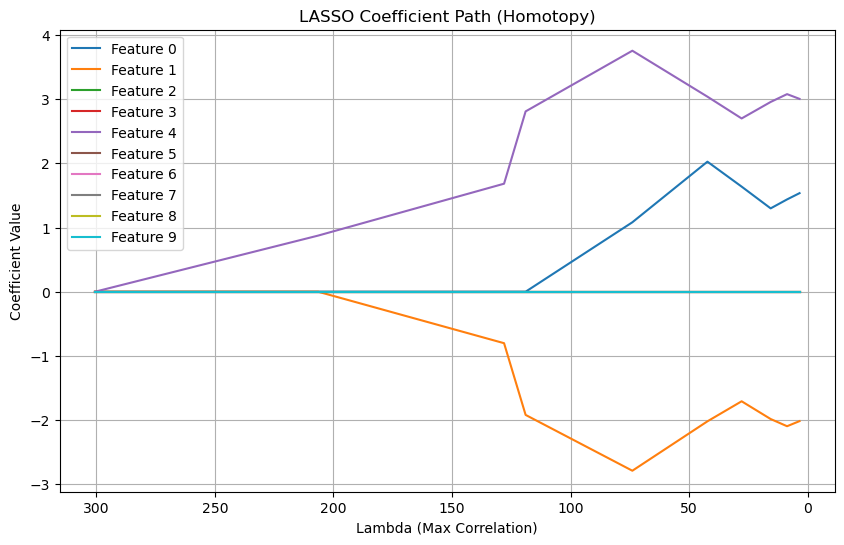

In [8]:
# Plot coefficient path
coef_path = np.array(model.coef_path_)
lambdas = model.lambda_path_

plt.figure(figsize=(10, 6))
for i in range(coef_path.shape[1]):
    plt.plot(lambdas, coef_path[:, i], label=f"Feature {i}")
plt.xlabel("Lambda (Max Correlation)")
plt.ylabel("Coefficient Value")
plt.title("LASSO Coefficient Path (Homotopy)")
plt.legend()
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()


In [10]:
# Now demonstrate online update using RecLasso
rec_model = RecLassoModel()
rec_model.fit(X, y)

# Add a new data point
x_new = np.random.randn(n_features)
y_new = x_new @ true_coef + np.random.randn() * 0.1

# Coefficients before update
print("Before partial_fit:", rec_model.beta)

# Perform online update
rec_model.partial_fit(x_new, y_new)

# Coefficients after update
print("After partial_fit:", rec_model.beta)


Before partial_fit: [ 1.51285203 -1.99763678  0.          0.          2.98405746  0.
  0.          0.          0.          0.        ]
After partial_fit: [ 1.48201488 -1.9935955   0.          0.          2.97888976  0.
  0.          0.          0.          0.        ]


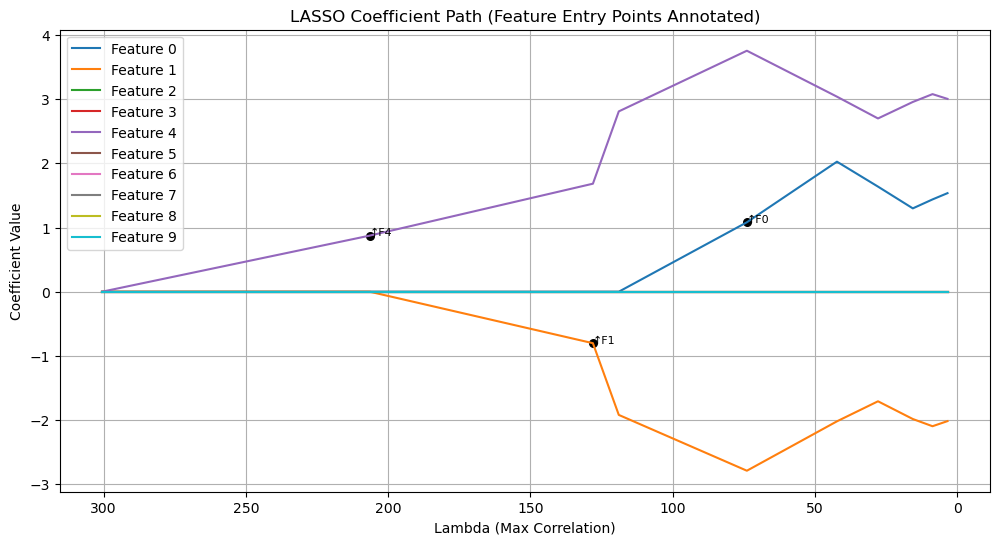

In [12]:
# Annotated version: Highlight when features become active
coef_path = np.array(model.coef_path_)
lambdas = model.lambda_path_

plt.figure(figsize=(12, 6))
for i in range(coef_path.shape[1]):
    coef_i = coef_path[:, i]
    
    # Plot path
    plt.plot(lambdas, coef_i, label=f"Feature {i}")

    # Find first non-zero point and annotate
    nonzero_indices = np.where(np.abs(coef_i) > 1e-4)[0]
    if len(nonzero_indices) > 0:
        first_idx = nonzero_indices[0]
        plt.scatter(lambdas[first_idx], coef_i[first_idx], color='black', s=30)
        plt.text(lambdas[first_idx], coef_i[first_idx], f"↑F{i}", fontsize=8, ha='left')

plt.xlabel("Lambda (Max Correlation)")
plt.ylabel("Coefficient Value")
plt.title("LASSO Coefficient Path (Feature Entry Points Annotated)")
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend()
plt.show()


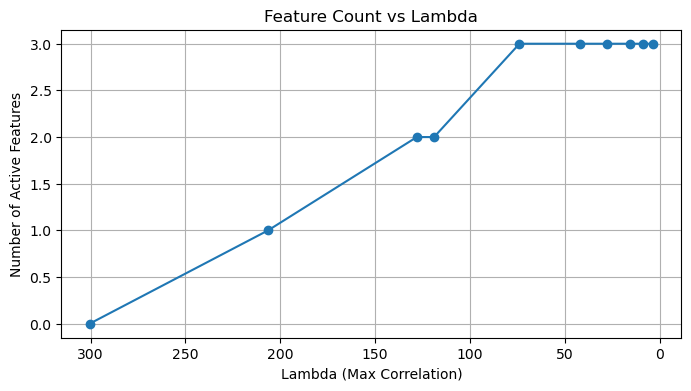

In [14]:
# Track how many features are active at each lambda
active_counts = (np.abs(coef_path) > 1e-4).sum(axis=1)

plt.figure(figsize=(8, 4))
plt.plot(lambdas, active_counts, marker='o')
plt.xlabel("Lambda (Max Correlation)")
plt.ylabel("Number of Active Features")
plt.title("Feature Count vs Lambda")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()
